<a href="https://colab.research.google.com/github/Kshitiz2603/Bank-Marketing/blob/main/BankMarketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
url = 'https://raw.githubusercontent.com/Kshitiz2603/Bank-Marketing/main/bank-additional-full.csv'
bank = pd.read_csv(url,sep=';')
y = pd.get_dummies(bank['y'], columns = ['y'], prefix = ['y'], drop_first = True)
bank.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
bank_client = bank.iloc[: , 0:7]
bank_client.head(10)

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes
5,45,services,married,basic.9y,unknown,no,no
6,59,admin.,married,professional.course,no,no,no
7,41,blue-collar,married,unknown,unknown,no,no
8,24,technician,single,professional.course,no,yes,no
9,25,services,single,high.school,no,yes,no


In [ ]:
print('Jobs:\n', bank_client['job'].unique())
print('Marital:\n', bank_client['marital'].unique())
print('Education:\n', bank_client['education'].unique())
print('Default:\n', bank_client['default'].unique())
print('Housing:\n', bank_client['housing'].unique())
print('Loan:\n', bank_client['loan'].unique())

Jobs:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Marital:
 ['married' 'single' 'divorced' 'unknown']
Education:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Default:
 ['no' 'unknown' 'yes']
Housing:
 ['no' 'yes' 'unknown']
Loan:
 ['no' 'yes' 'unknown']


In [ ]:
print('Max age: ', bank_client['age'].max())
print('Min age: ', bank_client['age'].min())
print('Null Values: ', bank_client['age'].isnull().any())

Max age:  98
Min age:  17
Null Values:  False


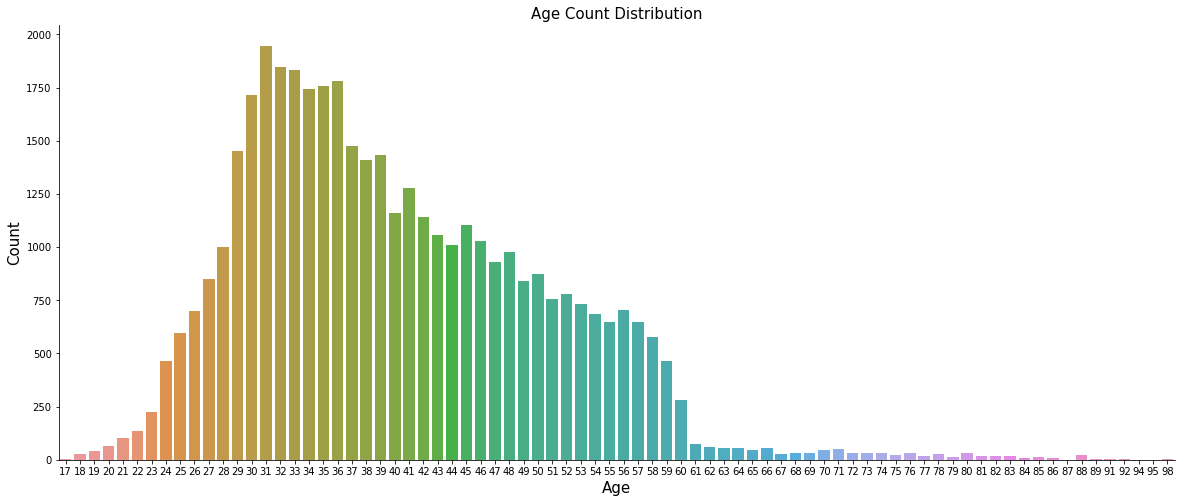

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank_client)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

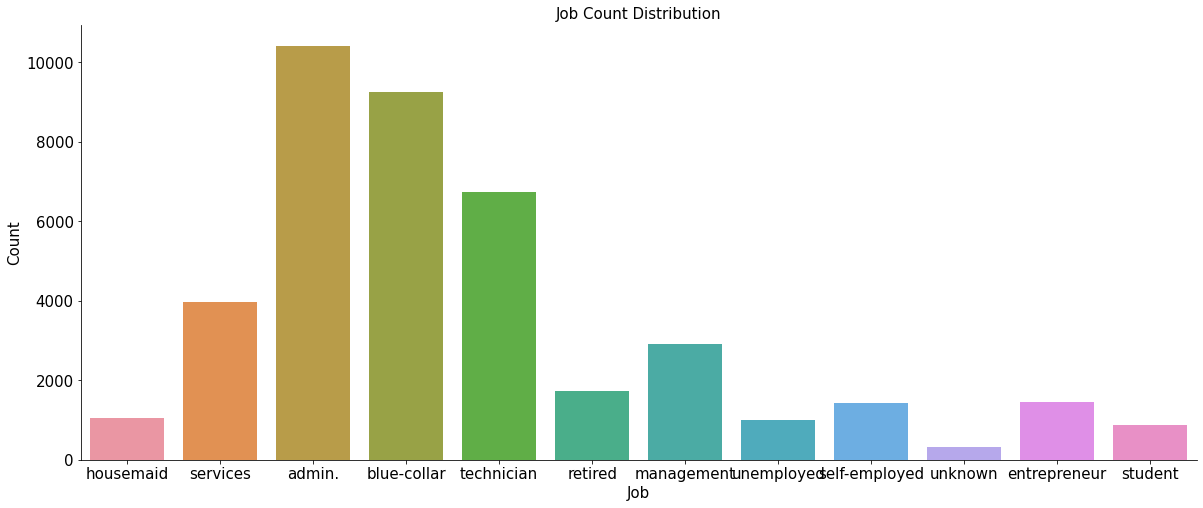

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = bank_client)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

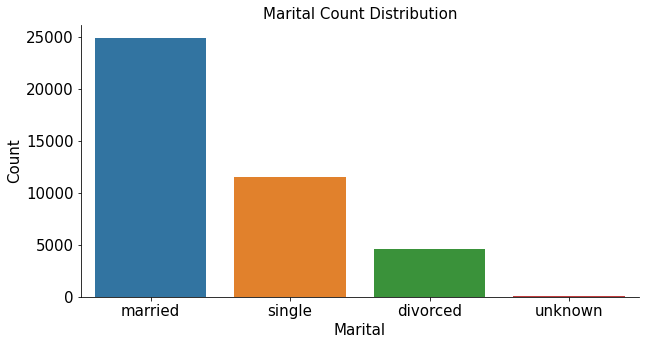

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = bank_client)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

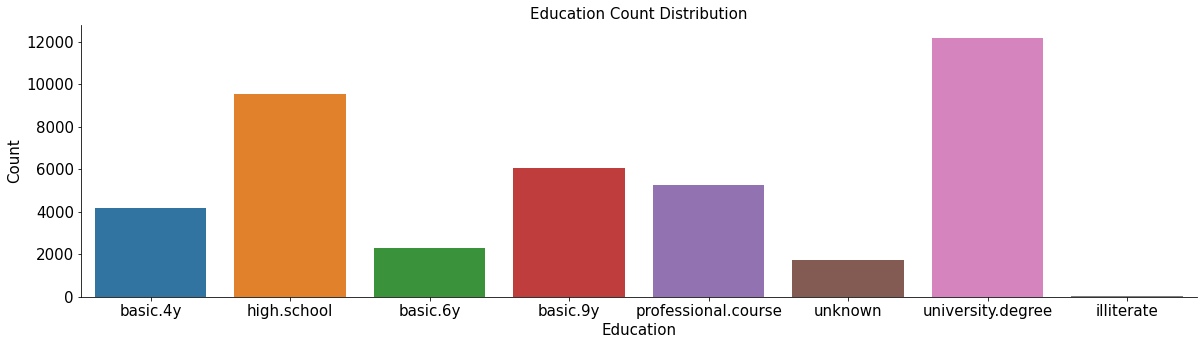

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = bank_client)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

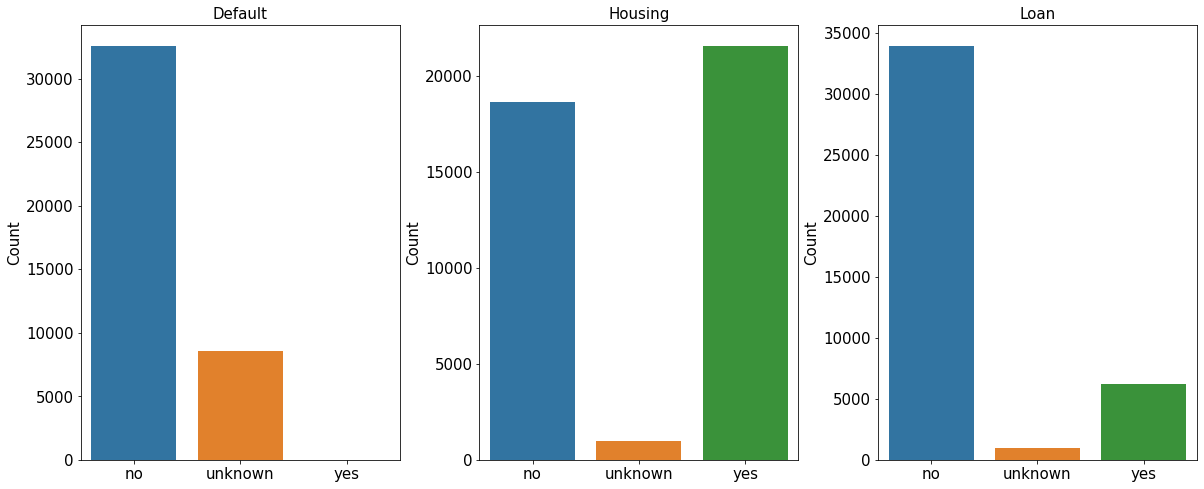

In [ ]:
# Default
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = bank_client, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)
# Housing
sns.countplot(x = 'housing', data = bank_client, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)
# Loan
sns.countplot(x = 'loan', data = bank_client, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)
plt.subplots_adjust(wspace=0.25)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_client['job'] = labelencoder_X.fit_transform(bank_client['job'])
bank_client['marital'] = labelencoder_X.fit_transform(bank_client['marital'])
bank_client['education']= labelencoder_X.fit_transform(bank_client['education'])
bank_client['default'] = labelencoder_X.fit_transform(bank_client['default'])
bank_client['housing'] = labelencoder_X.fit_transform(bank_client['housing'])
bank_client['loan'] = labelencoder_X.fit_transform(bank_client['loan']) 

In [ ]:
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
    return dataframe
age(bank_client);

In [ ]:
bank_client.head()

,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,2


In [ ]:
print(bank_client.shape)
bank_client.head()

(41188, 7)


,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,2


In [ ]:
bank_related = bank.iloc[: , 7:11]
bank_related.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


In [ ]:
print("Kind of Contact: \n", bank_related['contact'].unique())
print("Which monthis this campaign work: \n", bank_related['month'].unique())
print("Which days of week this campaign work: \n", bank_related['day_of_week'].unique())

Kind of Contact: 
 ['telephone' 'cellular']
Which monthis this campaign work: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Which days of week this campaign work: 
 ['mon' 'tue' 'wed' 'thu' 'fri']


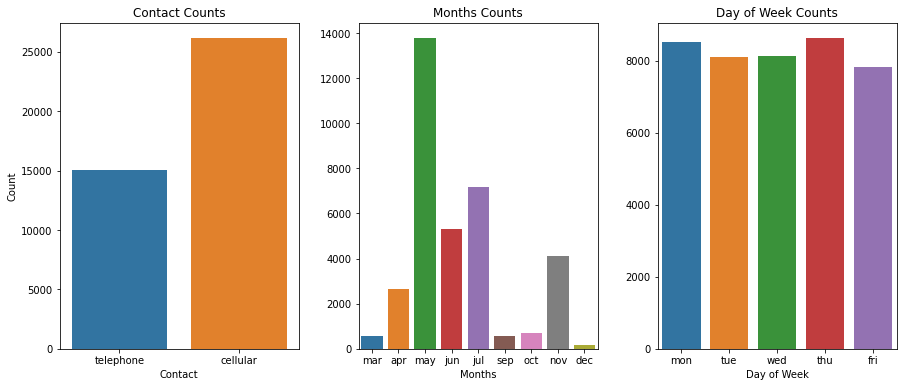

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(bank_related['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)
sns.countplot(bank_related['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul','sep','oct','nov','dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)
sns.countplot(bank_related['day_of_week'], ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)
plt.subplots_adjust(wspace=0.25)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_related['contact'] = labelencoder_X.fit_transform(bank_related['contact'])
bank_related['month'] = labelencoder_X.fit_transform(bank_related['month'])
bank_related['day_of_week'] = labelencoder_X.fit_transform(bank_related['day_of_week']) 

In [ ]:
def duration(data):
    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180) , 'duration'] = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319) , 'duration'] = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration'] > 644.5, 'duration'] = 5
    return data
duration(bank_related);

In [ ]:
bank_related.head()

,contact,month,day_of_week,duration
0,1,6,1,3
1,1,6,1,2
2,1,6,1,3
3,1,6,1,2
4,1,6,1,3


In [ ]:
bank_se = bank.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
bank_o = bank.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [ ]:
bank_o['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [ ]:
bank_o['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace = True)

In [ ]:
bank_final= pd.concat([bank_client, bank_related, bank_se, bank_o], axis = 1)
bank_final = bank_final[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
 'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx',
 'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous']]
bank_final.shape

(41188, 19)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bank_final, y, test_size = 0.33)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score

In [ ]:
X_test.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous
4874,2,0,1,3,0,1,1,1,6,4,2,1.1,93.994,-36.4,4.858,5191.0,2,999,0
16274,2,7,2,3,0,0,2,0,3,3,1,1.4,93.918,-42.7,4.961,5228.1,2,999,0
38335,2,0,2,3,0,0,0,0,8,0,1,-3.4,92.431,-26.9,0.739,5017.5,1,999,0
32794,1,4,2,6,0,2,0,0,6,1,2,-1.8,92.893,-46.2,1.299,5099.1,1,999,0
15003,2,1,1,2,1,2,0,1,3,2,3,1.4,93.918,-42.7,4.958,5228.1,3,999,0
10418,1,1,2,3,0,2,0,1,4,1,5,1.4,94.465,-41.8,4.960,5228.1,2,999,0
11043,3,9,1,5,1,2,0,1,4,4,4,1.4,94.465,-41.8,4.962,5228.1,13,999,0
25645,2,9,1,3,0,2,0,0,7,4,2,-0.1,93.200,-42.0,4.120,5195.8,1,999,0
13095,1,0,2,2,0,0,0,1,3,3,3,1.4,93.918,-42.7,4.962,5228.1,5,999,0
24405,2,10,1,2,0,2,0,0,7,1,4,-0.1,93.200,-42.0,4.191,5195.8,1,999,0


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
import sklearn
import math
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)
print('Confusion Matrix: \n', confusion_matrix(y_test, logpred))
print('Accuracy: ', accuracy_score(y_test, logpred))
print('Precision: ', precision_score(y_test, logpred))
print('Recall: ', recall_score(y_test, logpred))
print('f1 Score', f1_score(y_test, logpred))
mse = sklearn.metrics.mean_squared_error(y_test, logpred)
rmse = math.sqrt(mse)
print('Root Mean Square Error: ',rmse)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

Confusion Matrix: 
 [[11798   310]
 [  909   576]]
Accuracy:  0.9103214890016921
Precision:  0.6501128668171557
Recall:  0.3878787878787879
f1 Score 0.4858709405314214
Root Mean Square Error:  0.2994637056444536


In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print('Confusion Matrix: \n', confusion_matrix(y_test, svcpred))
print('Accuracy: ', accuracy_score(y_test, svcpred))
print('Precision: ', precision_score(y_test, svcpred))
print('Recall: ', recall_score(y_test, svcpred))
print('f1 Score', f1_score(y_test, svcpred))
mse = sklearn.metrics.mean_squared_error(y_test, svcpred)
rmse = math.sqrt(mse)
print('Root Mean Square Error: ',rmse)
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

Confusion Matrix: 
 [[11164   944]
 [  903   582]]
Accuracy:  0.8641212388729493
Precision:  0.381389252948886
Recall:  0.39191919191919194
f1 Score 0.3865825307206908
Root Mean Square Error:  0.368617364114946


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)
print('Confusion Matrix: \n', confusion_matrix(y_test, dtreepred))
print('Accuracy: ', accuracy_score(y_test, dtreepred))
print('Precision: ', precision_score(y_test, dtreepred))
print('Recall: ', recall_score(y_test, dtreepred))
print('f1 Score', f1_score(y_test, dtreepred))
mse = sklearn.metrics.mean_squared_error(y_test, dtreepred)
rmse = math.sqrt(mse)
print('Root Mean Square Error: ',rmse)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

Confusion Matrix: 
 [[11296   812]
 [  706   779]]
Accuracy:  0.8883248730964467
Precision:  0.4896291640477687
Recall:  0.5245791245791246
f1 Score 0.5065019505851754
Root Mean Square Error:  0.33417828610421907


In [ ]:
import sklearn
import math
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200, criterion='entropy')#criterion = entopy,gi
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)
print('Confusion Matrix: \n', confusion_matrix(y_test, rfcpred))
print('Accuracy: ', accuracy_score(y_test, rfcpred))
print('Precision: ', precision_score(y_test, rfcpred))
print('Recall: ', recall_score(y_test, rfcpred))
print('f1 Score', f1_score(y_test, rfcpred))
mse = sklearn.metrics.mean_squared_error(y_test, rfcpred)
rmse = math.sqrt(mse)
print('Root Mean Square Error: ',rmse)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())


Confusion Matrix: 
 [[11640   468]
 [  730   755]]
Accuracy:  0.9118664018244684
Precision:  0.6173344235486509
Recall:  0.5084175084175084
f1 Score 0.5576070901033974
Root Mean Square Error:  0.29687303376280494


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)
print('Confusion Matrix: \n', confusion_matrix(y_test, xgbprd))
print('Accuracy: ', accuracy_score(y_test, xgbprd))
print('Precision: ', precision_score(y_test, xgbprd))
print('Recall: ', recall_score(y_test, xgbprd))
print('f1 Score', f1_score(y_test, xgbprd))
mse = sklearn.metrics.mean_squared_error(y_test, xgbprd)
rmse = math.sqrt(mse)
print('Root Mean Square Error: ',rmse)
XGB = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10).mean())

Confusion Matrix: 
 [[11725   383]
 [  755   730]]
Accuracy:  0.9162804384609725
Precision:  0.655884995507637
Recall:  0.49158249158249157
f1 Score 0.5619707467282525
Root Mean Square Error:  0.28934332813981983


In [ ]:
models = pd.DataFrame({
 'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
 'Logistic Model', 'XGBoost'],
 'Score': [RFCCV, DTREECV, SVCCV, LOGCV, XGB]})
models.sort_values(by='Score', ascending=False)

,Models,Score
4,XGBoost,0.912267
3,Logistic Model,0.907120
0,Random Forest Classifier,0.906903
1,Decision Tree Classifier,0.882660
2,Support Vector Machine,0.861823
